In [1]:
import pandas as pd
import numpy as np
import pickle

In [149]:
label_train = []
label_test = []
def reading_train(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes') 
    train = dict[b'data']
    train = train.reshape((len(train), 3, 32, 32)).transpose(0, 2, 3, 1)
    for i in dict[b'labels']:
        label_train.append(i)
    return train

def reading_test(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes') 
    train = dict[b'data']
    train = train.reshape((len(train), 3, 32, 32)).transpose(0, 2, 3, 1)   
    for i in dict[b'labels']:
        label_test.append(i)
    return train

df1 = reading_train('data_batch_1')
df2 = reading_train('data_batch_2')
df3 = reading_train('data_batch_3')
df4 = reading_train('data_batch_4')
df5 = reading_train('data_batch_5')
ataboi = np.concatenate((df1,df2,df3,df4,df5))
dftest = reading_test('test_batch') 
ataboi.shape
len(label_train)

50000

In [150]:
augmented = []
i = 0
for item in ataboi:
    flip_1 = np.fliplr(item)
    flip_2 = np.flipud(item)
    augmented.append(flip_1)
    augmented.append(flip_2)
    label_train.append(label_train[i])
    label_train.append(label_train[i])
    i = i+1
len(label_train)

150000

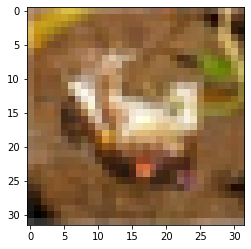

In [151]:
import matplotlib.pyplot as plt
plt.imshow(augmented[1])

In [152]:
arr = np.array(augmented)

In [153]:
arr.shape

(100000, 32, 32, 3)

In [154]:
ataboi = np.concatenate((ataboi,arr))
len(ataboi)

150000

In [155]:
dftest.shape

(10000, 32, 32, 3)

In [156]:
print(dftest)

[[[[158 112  49]
   [159 111  47]
   [165 116  51]
   ...
   [137  95  36]
   [126  91  36]
   [116  85  33]]

  [[152 112  51]
   [151 110  40]
   [159 114  45]
   ...
   [136  95  31]
   [125  91  32]
   [119  88  34]]

  [[151 110  47]
   [151 109  33]
   [158 111  36]
   ...
   [139  98  34]
   [130  95  34]
   [120  89  33]]

  ...

  [[ 68 124 177]
   [ 42 100 148]
   [ 31  88 137]
   ...
   [ 38  97 146]
   [ 13  64 108]
   [ 40  85 127]]

  [[ 61 116 168]
   [ 49 102 148]
   [ 35  85 132]
   ...
   [ 26  82 130]
   [ 29  82 126]
   [ 20  64 107]]

  [[ 54 107 160]
   [ 56 105 149]
   [ 45  89 132]
   ...
   [ 24  77 124]
   [ 34  84 129]
   [ 21  67 110]]]


 [[[235 235 235]
   [231 231 231]
   [232 232 232]
   ...
   [233 233 233]
   [233 233 233]
   [232 232 232]]

  [[238 238 238]
   [235 235 235]
   [235 235 235]
   ...
   [236 236 236]
   [236 236 236]
   [235 235 235]]

  [[237 237 237]
   [234 234 234]
   [234 234 234]
   ...
   [235 235 235]
   [235 235 235]
   [234 234

In [157]:
ataboi,dftest = ataboi / 255.0, dftest / 255.0

In [158]:
print(dftest)

[[[[0.61960784 0.43921569 0.19215686]
   [0.62352941 0.43529412 0.18431373]
   [0.64705882 0.45490196 0.2       ]
   ...
   [0.5372549  0.37254902 0.14117647]
   [0.49411765 0.35686275 0.14117647]
   [0.45490196 0.33333333 0.12941176]]

  [[0.59607843 0.43921569 0.2       ]
   [0.59215686 0.43137255 0.15686275]
   [0.62352941 0.44705882 0.17647059]
   ...
   [0.53333333 0.37254902 0.12156863]
   [0.49019608 0.35686275 0.1254902 ]
   [0.46666667 0.34509804 0.13333333]]

  [[0.59215686 0.43137255 0.18431373]
   [0.59215686 0.42745098 0.12941176]
   [0.61960784 0.43529412 0.14117647]
   ...
   [0.54509804 0.38431373 0.13333333]
   [0.50980392 0.37254902 0.13333333]
   [0.47058824 0.34901961 0.12941176]]

  ...

  [[0.26666667 0.48627451 0.69411765]
   [0.16470588 0.39215686 0.58039216]
   [0.12156863 0.34509804 0.5372549 ]
   ...
   [0.14901961 0.38039216 0.57254902]
   [0.05098039 0.25098039 0.42352941]
   [0.15686275 0.33333333 0.49803922]]

  [[0.23921569 0.45490196 0.65882353]
   [0.1

In [159]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization,Concatenate
from keras.optimizers import SGD, Adam, RMSprop
from keras.regularizers import l2

In [160]:
'''model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(32,32,3), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3,3), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Conv2D(64, (2, 2), kernel_regularizer=l2(0.001))) 
model.add(Activation('relu'))
model.add(Conv2D(64, (2,2), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), kernel_regularizer=l2(0.001))) 
model.add(Activation('relu')) 
model.add(Conv2D(128, (3,3), kernel_regularizer=l2(0.001)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten()) 
model.add(Dense(128, kernel_regularizer=l2(0.001))) 
model.add(Activation('relu'))
model.add(Dense(64, kernel_regularizer=l2(0.001))) 
model.add(Activation('relu'))
model.add(Dense(32, kernel_regularizer=l2(0.001))) 
model.add(Activation('relu'))
model.add(Dense(10, kernel_regularizer=l2(0.001)))
model.add(Activation('softmax'))'''

model5 = Sequential()
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model5.add(BatchNormalization())
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.2))
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.3))
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.4))
model5.add(Flatten())
model5.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(10, activation='softmax'))

In [162]:
model5.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_26 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_27 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 16, 16, 64)      

In [163]:
model5.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [164]:
history = model5.fit(ataboi,label_train,epochs=50,batch_size=64,validation_split=0.1)

Train on 135000 samples, validate on 15000 samples
Epoch 1/50
135000/135000 [==============================] - 103s 761us/step - loss: 1.4501 - accuracy: 0.4843 - val_loss: 1.0352 - val_accuracy: 0.6243
Epoch 2/50
135000/135000 [==============================] - 119s 885us/step - loss: 0.9797 - accuracy: 0.6539 - val_loss: 0.8361 - val_accuracy: 0.7010
Epoch 3/50
135000/135000 [==============================] - 108s 800us/step - loss: 0.8246 - accuracy: 0.7121 - val_loss: 0.7408 - val_accuracy: 0.7377
Epoch 4/50
135000/135000 [==============================] - 107s 793us/step - loss: 0.7351 - accuracy: 0.7442 - val_loss: 0.6613 - val_accuracy: 0.7645
Epoch 5/50
135000/135000 [==============================] - 110s 814us/step - loss: 0.6768 - accuracy: 0.7648 - val_loss: 0.6150 - val_accuracy: 0.7832
Epoch 6/50
135000/135000 [==============================] - 108s 801us/step - loss: 0.6330 - accuracy: 0.7814 - val_loss: 0.5819 - val_accuracy: 0.7964
Epoch 7/50
135000/135000 [===========

KeyboardInterrupt: 

In [166]:
scores = model5.evaluate(dftest, label_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 3s 330us/step
Test loss: 0.38915961905121804
Test accuracy: 0.8748999834060669


In [232]:
pred

array([[3.8276314e-05, 2.9366276e-09, 2.9694158e-19, ..., 6.1651457e-16,
        3.0886684e-05, 7.9112644e-13],
       [4.1766944e-14, 3.0670308e-12, 3.0803450e-23, ..., 8.4222784e-26,
        1.0000000e+00, 5.3620759e-16],
       [8.0118999e-03, 4.8041728e-01, 2.2097746e-09, ..., 7.3480527e-07,
        5.1152253e-01, 4.6661120e-05],
       ...,
       [1.1035643e-29, 1.3450249e-31, 1.0424476e-09, ..., 7.2111925e-09,
        1.3922243e-28, 1.5173318e-23],
       [1.6651195e-01, 6.9115651e-01, 9.2320004e-04, ..., 1.6630942e-03,
        2.3224892e-15, 6.1127258e-04],
       [2.2111463e-22, 1.2979057e-19, 3.1360392e-14, ..., 9.9999285e-01,
        3.4390107e-23, 4.2666176e-30]], dtype=float32)